In [307]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

In [308]:
#meme stock list are from https://finance.yahoo.com/news/top-10-meme-stocks-2021-194938202.html

In [309]:
#date range set to be a year 
start = datetime.datetime(2021,4,12)
end = datetime.datetime(2022,4,12)

In [310]:
#The meme stocks list in the Yahoo articles are choosen in this project
tickers = ['AMC','GME','BB','CLOV','ZOM','SNDL','BBBY','TSLA','WISH', 'XSPA']

In [311]:
AMC = data.DataReader("AMC", 'yahoo', start, end)
GME = data.DataReader("GME",'yahoo',start,end)
BB = data.DataReader("BB",'yahoo',start,end)
CLOV = data.DataReader("CLOV",'yahoo',start,end)
ZOM = data.DataReader("ZOM",'yahoo',start,end)
SNDL = data.DataReader("SNDL",'yahoo',start,end)
BBBY = data.DataReader("BBBY",'yahoo',start,end)
TSLA = data.DataReader("TSLA",'yahoo',start,end)
WISH = data.DataReader("WISH",'yahoo',start,end)
XSPA = data.DataReader("XSPA",'yahoo',start,end)

In [335]:
#merging all dataframe together
meme_stocks = pd.concat([AMC,GME,BB,CLOV,ZOM,SNDL,BBBY,TSLA,WISH,XSPA], axis=1,keys=tickers)
meme_stocks.columns.names = ['Stock Ticker','Stock Info']
meme_stocks.head(2)

Stock Ticker   AMC                                               GME  \
Stock Info    High   Low  Open Close    Volume Adj Close        High   
Date                                                                   
2021-04-12    9.49  8.51  9.44  8.62  51269800      8.62  163.899994   
2021-04-13    9.12  8.31  8.66  8.84  44049100      8.84  145.380005   

Stock Ticker                                      ...   WISH                  \
Stock Info           Low        Open       Close  ...   Open  Close   Volume   
Date                                              ...                          
2021-04-12    135.009995  158.110001  141.089996  ...  13.60  13.60  5564000   
2021-04-13    132.000000  141.880005  140.990005  ...  13.59  14.27  4814500   

Stock Ticker            XSPA                                       
Stock Info   Adj Close  High   Low  Open Close   Volume Adj Close  
Date                                                               
2021-04-12       13.60  1.59  1.46  1.58  1.52  4600000      1.52  
2021-04-13       14.27  1.51  1.46  1.48  1.48  3143800      1.48  

[2 rows x 60 columns]

In [336]:
#highest closing price of each stock
for name in tickers:
    print(name, meme_stocks[name]['Close'].max())

AMC 62.54999923706055
GME 302.55999755859375
BB 15.880000114440918
CLOV 22.149999618530273
ZOM 1.1299999952316284
SNDL 1.2899999618530273
BBBY 44.189998626708984
TSLA 1229.9100341796875
WISH 15.1899995803833
XSPA 2.1500000953674316


In [337]:
#dataframe for calculating %return of every single day on each stocks
returns = pd.DataFrame()
for name in tickers:
    returns[name+' Return'] = meme_stocks[name]['Close'].pct_change()
returns.head(5)

,AMC Return,GME Return,BB Return,CLOV Return,ZOM Return,SNDL Return,BBBY Return,TSLA Return,WISH Return,XSPA Return
Date,,,,,,,,,,
2021-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-13,0.025522,-0.000709,0.007752,-0.001279,-0.107143,0.053763,-0.053220,0.085957,0.049265,-0.026316
2021-04-14,0.057692,0.181148,-0.010989,-0.049936,0.130000,-0.081633,-0.122091,-0.039472,-0.051857,-0.006757
2021-04-15,0.058823,-0.060590,-0.025556,-0.009434,-0.137168,-0.053333,0.000816,0.009041,-0.059867,-0.081633
2021-04-16,-0.057576,-0.011186,-0.007982,0.200000,-0.128205,-0.005869,0.039935,0.001259,-0.022013,0.007407


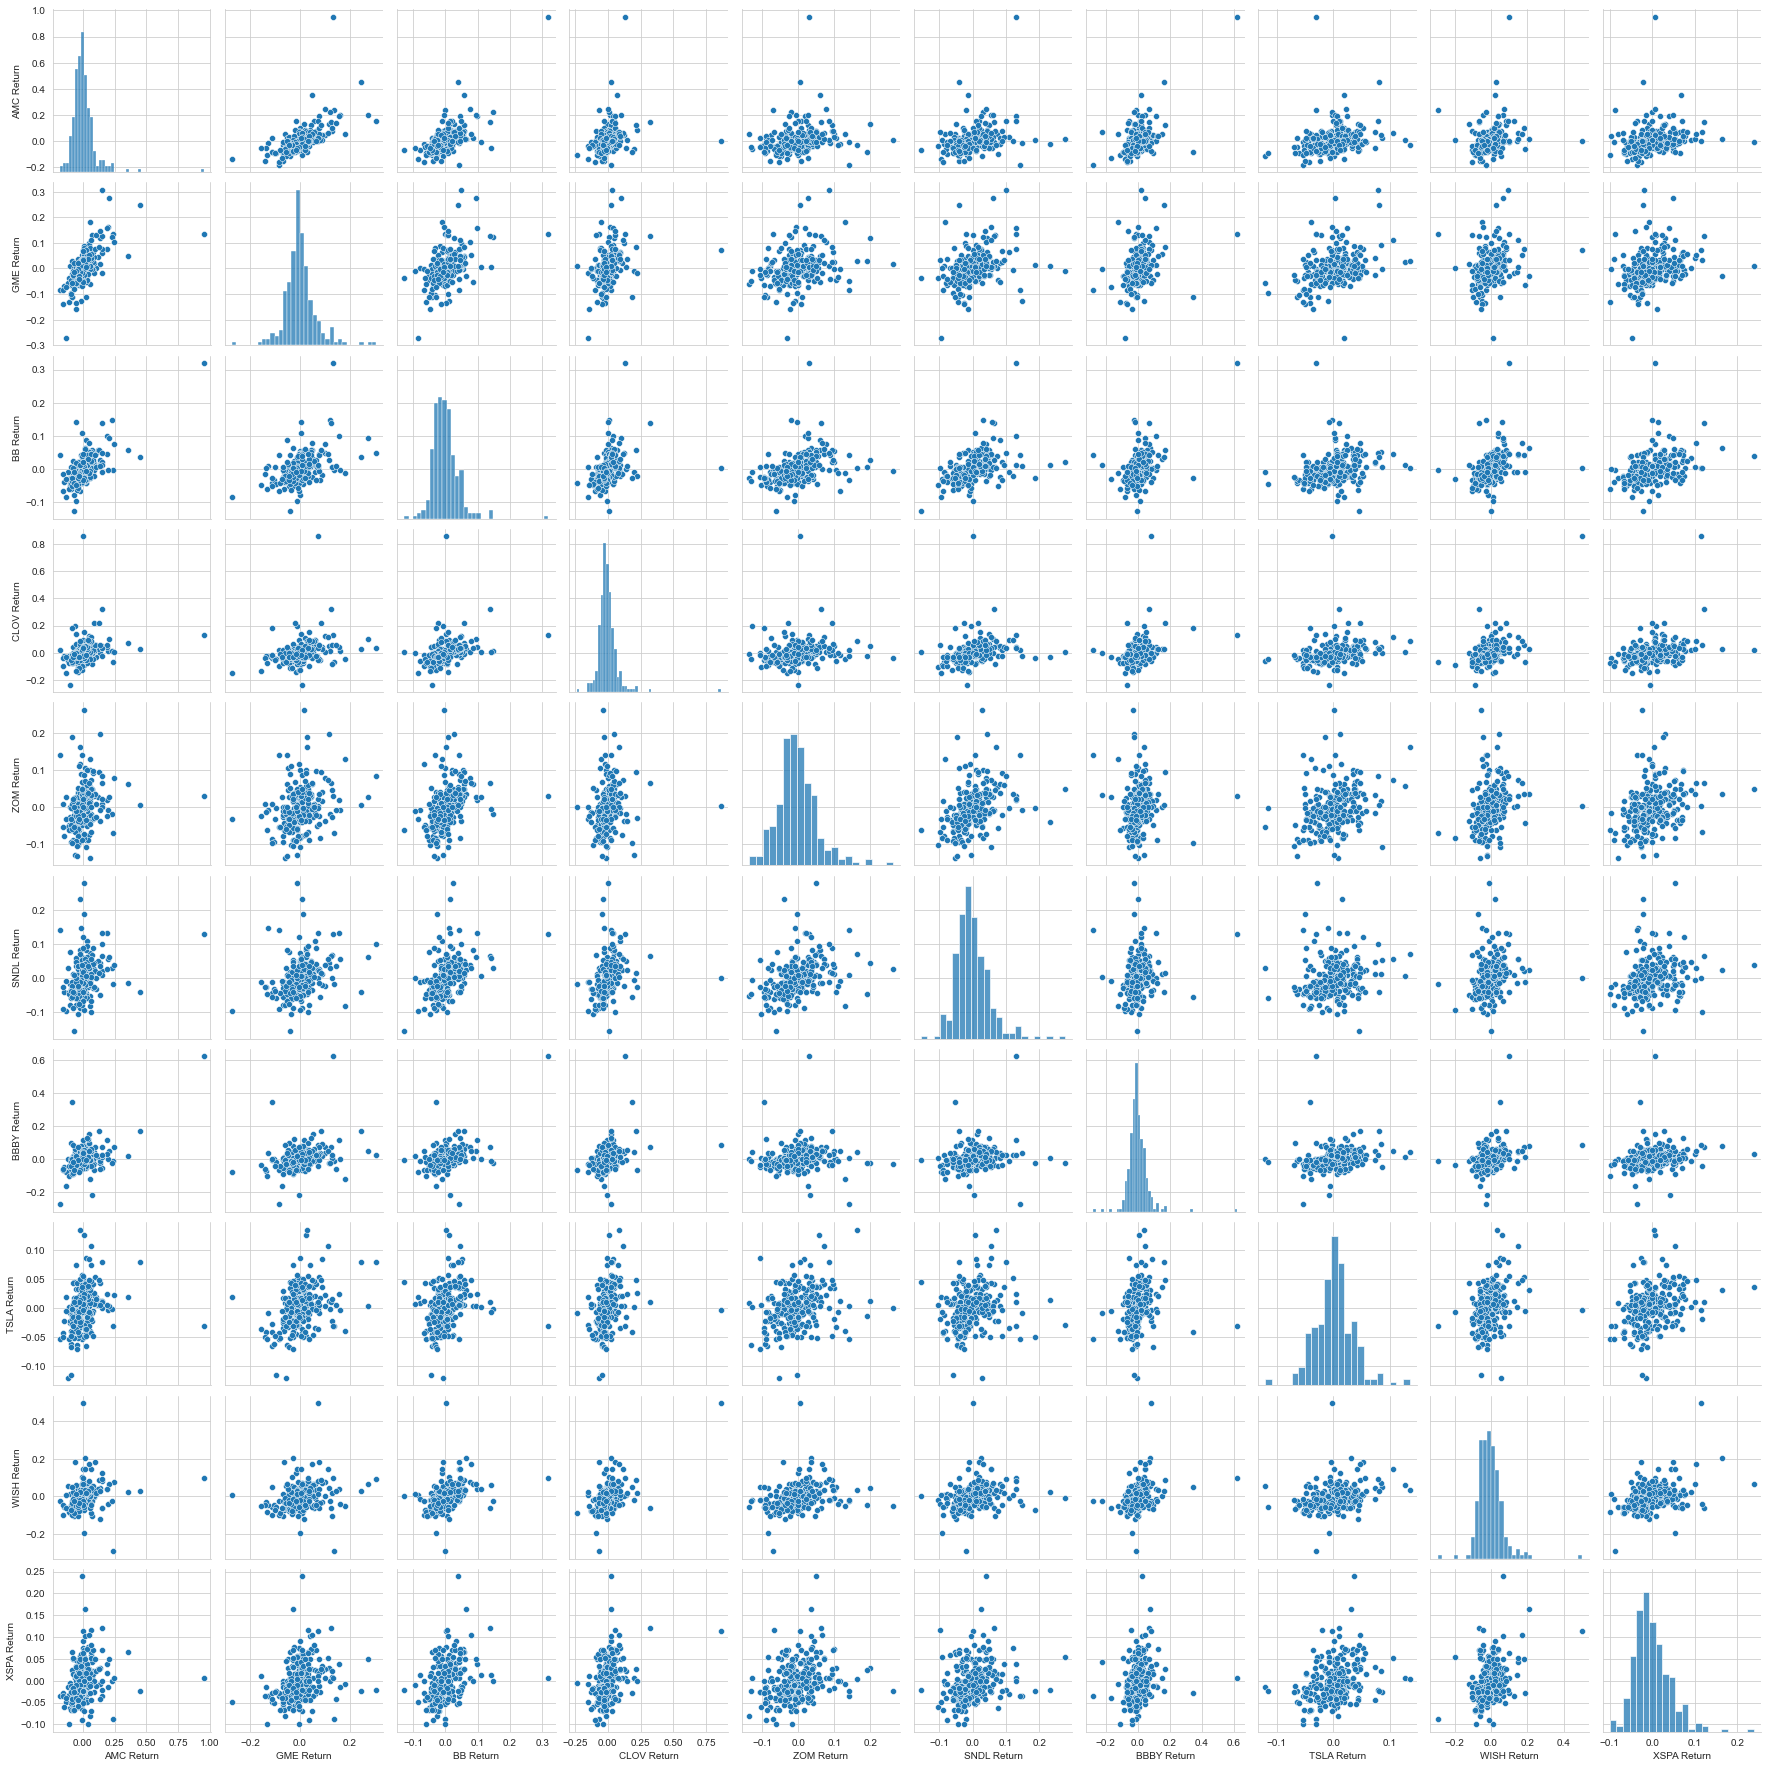

In [374]:
#simple plot of data to see if there is any obvious relationship between each meme stock
sns.pairplot(returns[1:])

In [384]:
#day with worst % return
print(returns.idxmin(),returns.min())

AMC Return    2021-06-03
GME Return    2021-06-10
BB Return     2021-06-04
CLOV Return   2021-06-09
ZOM Return    2021-04-15
SNDL Return   2021-06-04
BBBY Return   2021-06-03
TSLA Return   2021-11-09
WISH Return   2021-05-13
XSPA Return   2022-01-05
dtype: datetime64[ns] AMC Return    -0.179217
GME Return    -0.271582
BB Return     -0.127204
CLOV Return   -0.236117
ZOM Return    -0.137168
SNDL Return   -0.155039
BBBY Return   -0.278117
TSLA Return   -0.119903
WISH Return   -0.292938
XSPA Return   -0.100000
dtype: float64


In [381]:
#day with max % return
print(returns.idxmax(),returns.max())

AMC Return    2021-06-02
GME Return    2022-03-22
BB Return     2021-06-02
CLOV Return   2021-06-08
ZOM Return    2022-02-16
SNDL Return   2021-11-12
BBBY Return   2021-06-02
TSLA Return   2022-01-03
WISH Return   2021-06-08
XSPA Return   2022-03-17
dtype: datetime64[ns] AMC Return     0.952247
GME Return     0.307219
BB Return      0.319204
CLOV Return    0.858221
ZOM Return     0.262458
SNDL Return    0.277778
BBBY Return    0.621056
TSLA Return    0.135317
WISH Return    0.498711
XSPA Return    0.239316
dtype: float64


In [394]:
#Sometimes the stock drop significantly in just 1-2 days and lose all of the % increase in the previous day. we should get out of the trade within 1-2days
returns.idxmin()-returns.idxmax()  

AMC Return       1 days
GME Return    -285 days
BB Return        2 days
CLOV Return      1 days
ZOM Return    -307 days
SNDL Return   -161 days
BBBY Return      1 days
TSLA Return    -55 days
WISH Return    -26 days
XSPA Return    -71 days
dtype: timedelta64[ns]

In [393]:
#The stock with highest volatility. When it gets memed, the stock may have higest % increase
returns.std()

AMC Return     0.097827
GME Return     0.063741
BB Return      0.042323
CLOV Return    0.082297
ZOM Return     0.055855
SNDL Return    0.052875
BBBY Return    0.068186
TSLA Return    0.034141
WISH Return    0.067011
XSPA Return    0.044052
dtype: float64

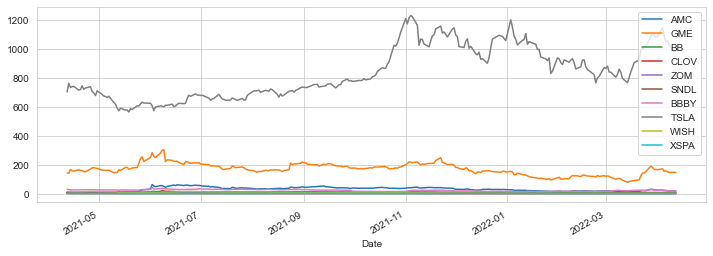

In [343]:
#ploting closing price
for name in tickers:
    meme_stocks[name]['Close'].plot(label=name,figsize=(12,4))
plt.legend()

In [396]:
#We can see that ZOM and SNDL have similar movement pattern on last year.
#Therefore, next time when we see one of them have sigificant increase in stock price, 
#we have try to but another one if the price not yet following 

meme_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

In [397]:
#correlation between each meme stock

meme_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

Stock Ticker,AMC,GME,BB,CLOV,ZOM,SNDL,BBBY,TSLA,WISH,XSPA
Stock Ticker,,,,,,,,,,
AMC,1.000000,0.745108,0.842336,0.634208,0.224746,0.513186,0.416717,-0.154928,0.248386,0.436362
GME,0.745108,1.000000,0.834167,0.758134,0.588752,0.757779,0.583139,-0.249674,0.485311,0.298258
BB,0.842336,0.834167,1.000000,0.817387,0.573284,0.762543,0.555711,-0.313649,0.540136,0.446301
CLOV,0.634208,0.758134,0.817387,1.000000,0.818238,0.850015,0.725340,-0.613790,0.828930,0.217781
ZOM,0.224746,0.588752,0.573284,0.818238,1.000000,0.852309,0.707847,-0.693331,0.929166,-0.003908
SNDL,0.513186,0.757779,0.762543,0.850015,0.852309,1.000000,0.822078,-0.585000,0.815010,0.156667
BBBY,0.416717,0.583139,0.555711,0.725340,0.707847,0.822078,1.000000,-0.659635,0.739477,0.052932
TSLA,-0.154928,-0.249674,-0.313649,-0.613790,-0.693331,-0.585000,-0.659635,1.000000,-0.714188,0.119221
WISH,0.248386,0.485311,0.540136,0.828930,0.929166,0.815010,0.739477,-0.714188,1.000000,0.079544


<AxesSubplot:xlabel='Stock Ticker', ylabel='Stock Ticker'>

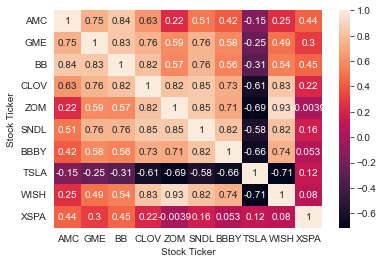

In [398]:
#finding the correlation and try to cluster the stocks into categories and find the relationship.
#when the number is close to 1, they have more positive relationship.

sns.heatmap(meme_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

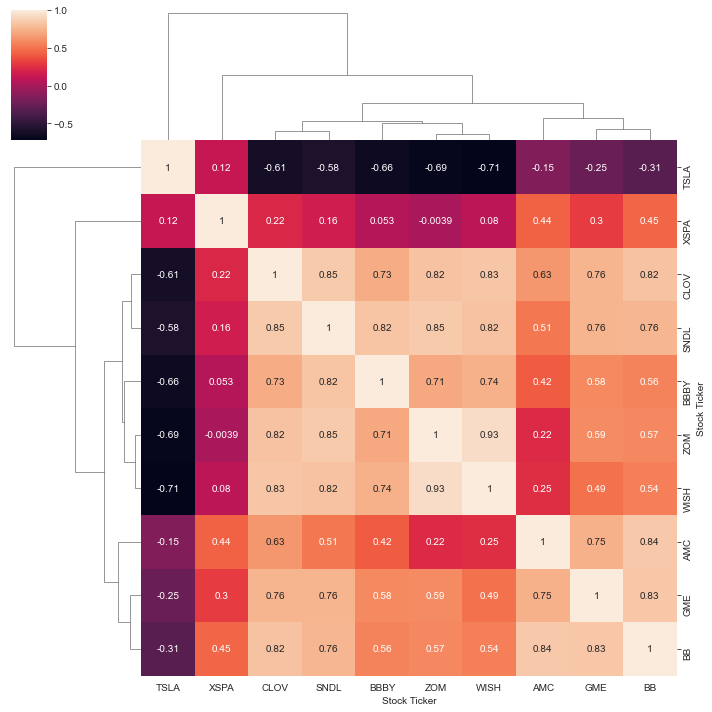

In [354]:
#clustering the meme stocks 
#On the previous stock chat, we realise that ZOM and SNDL and some kind of positive relaitonship
#on the following clustermap, they have 0.85 relationship, which further proven our thought

sns.clustermap(meme_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

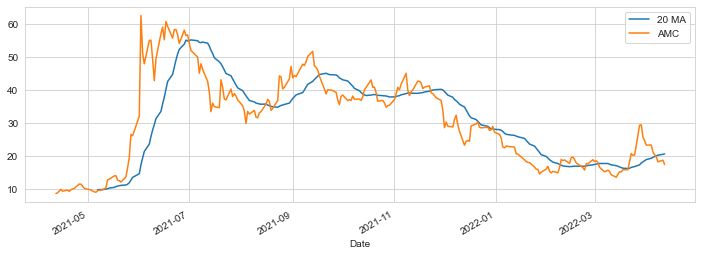

In [402]:
#then we further find out the specfic buying point 
#I tried to apply to simpliest entry strategy of golden cross and death cross
#if we buy when the price go above the 20 days simple moving average(SMA20)
#we sell when the price go below 20SMA
#we can have significant return if the stock price have significant movement.
#however, we can not capture the whole profit as the indicator delay a bit


plt.figure(figsize=(12,4))
AMC['Close'].loc['2021-04-12':'2022-04-12'].rolling(window=20).mean().plot(label='20 MA')
AMC['Close'].loc['2021-04-12':'2022-04-12'].plot(label='AMC')
plt.legend()

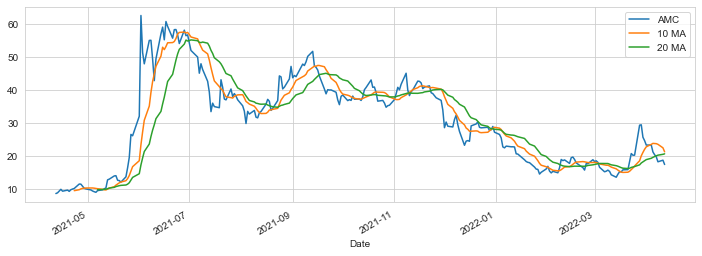

In [408]:
#To improve the strategy,
#we buy when the price go above the 20 days simple moving average(SMA20)
#we sell when the price go below 10SMA
#in that case, we can leave the trade a little bit earlier and earn more

plt.figure(figsize=(12,4))
AMC['Close'].loc['2021-04-12':'2022-04-12'].plot(label='AMC')
AMC['Close'].loc['2021-04-12':'2022-04-12'].rolling(window=10).mean().plot(label='10 MA')
AMC['Close'].loc['2021-04-12':'2022-04-12'].rolling(window=20).mean().plot(label='20 MA')

plt.legend()